# Support Ticket Classifier using Bag-of-Words

This notebook demonstrates a simple ticket routing system using BoW.
Tickets are classified into three categories:
- **Billing**: Issues related to payments, refunds, charges
- **Technical**: Bugs, errors, crashes, technical problems
- **Sales**: Demos, pricing, upgrades, product inquiries

**Author**: Siva Sai Yadav

In [15]:
# Import required libraries
import pandas as pd # For data manipulation and analysis
import numpy as np # For numerical operations
from sklearn.feature_extraction.text import CountVectorizer # For converting text to numerical features
from sklearn.model_selection import train_test_split # For splitting data into training and testing sets
from sklearn.linear_model import LogisticRegression # For building the classification model
from sklearn.metrics import classification_report, confusion_matrix # For evaluating model performance
import matplotlib.pyplot as plt # For plotting and visualization
import seaborn as sns # For enhanced data visualizations
import warnings # To manage warnings
warnings.filterwarnings('ignore') # Ignore warnings for cleaner output

print("✓ All libraries imported successfully")

✓ All libraries imported successfully


## Part 1: Create Sample Dataset

We'll create a realistic dataset of 45 support tickets across three categories.

In [16]:
# Sample support tickets with labels
tickets_data = {
    'ticket_text': [
        # Billing tickets
        "I was charged twice for my subscription this month",
        "Need a refund for the payment made yesterday",
        "My credit card was charged but I didn't authorize it",
        "Can I get an invoice for last month's payment",
        "The billing amount seems incorrect, please check",
        "I want to cancel my subscription and get a refund",
        "Why was I charged $99 when the price is $49",
        "Payment failed but money was deducted from my account",
        "I need to update my payment method",
        "Can you send me a receipt for my recent charge",
        "I was billed for a service I didn't use",
        "The invoice amount doesn't match what I was quoted",
        "Please process a refund for my canceled order",
        "I got charged after canceling my subscription",
        "The payment gateway is showing an error",

        # Technical tickets
        "The app keeps crashing when I try to login",
        "Getting error 404 when accessing the dashboard",
        "Software bug: cannot save my work",
        "The system is running very slow today",
        "I'm experiencing a server timeout error",
        "The application freezes when uploading files",
        "Login page shows internal server error",
        "Getting a database connection error message",
        "The app crashed and I lost all my data",
        "Cannot access the platform, getting error 500",
        "Bug report: Export feature is not working",
        "The API is returning incorrect data",
        "Mobile app crashes on startup",
        "Website is down, cannot access any pages",
        "Getting SSL certificate error when logging in",

        # Sales tickets
        "I'm interested in the enterprise pricing plan",
        "Can I schedule a product demo for next week",
        "What features are included in the premium package",
        "I want to upgrade from basic to pro plan",
        "Can you send me information about your pricing",
        "Interested in purchasing licenses for my team",
        "How does your product compare to competitors",
        "I'd like to request a sales call to discuss options",
        "What's the difference between standard and premium",
        "Can we get a custom quote for 100 users",
        "I want to trial the premium features first",
        "Interested in volume discount for bulk purchase",
        "Can you explain the enterprise tier benefits",
        "Looking to upgrade our current subscription",
        "Need pricing information for annual plans"
    ],
    'category': [
        # Billing labels
        'Billing', 'Billing', 'Billing', 'Billing', 'Billing',
        'Billing', 'Billing', 'Billing', 'Billing', 'Billing',
        'Billing', 'Billing', 'Billing', 'Billing', 'Billing',

        # Technical labels
        'Technical', 'Technical', 'Technical', 'Technical', 'Technical',
        'Technical', 'Technical', 'Technical', 'Technical', 'Technical',
        'Technical', 'Technical', 'Technical', 'Technical', 'Technical',

        # Sales labels
        'Sales', 'Sales', 'Sales', 'Sales', 'Sales',
        'Sales', 'Sales', 'Sales', 'Sales', 'Sales',
        'Sales', 'Sales', 'Sales', 'Sales', 'Sales'
    ]
}

# Create DataFrame
df = pd.DataFrame(tickets_data)

print("="*70)
print("SUPPORT TICKET DATASET")
print("="*70)
print(f"Total tickets: {len(df)}")
print(f"\nCategory distribution:")
print(df['category'].value_counts())
print(f"\nSample tickets:")
df.head(10)

SUPPORT TICKET DATASET
Total tickets: 45

Category distribution:
category
Billing      15
Technical    15
Sales        15
Name: count, dtype: int64

Sample tickets:


,ticket_text,category
0,I was charged twice for my subscription this m...,Billing
1,Need a refund for the payment made yesterday,Billing
2,My credit card was charged but I didn't author...,Billing
3,Can I get an invoice for last month's payment,Billing
4,"The billing amount seems incorrect, please check",Billing
5,I want to cancel my subscription and get a refund,Billing
6,Why was I charged $99 when the price is $49,Billing
7,Payment failed but money was deducted from my ...,Billing
8,I need to update my payment method,Billing
9,Can you send me a receipt for my recent charge,Billing


## Part 2: Bag-of-Words Vectorization

We'll convert text into numerical vectors using CountVectorizer (Bag-of-Words approach).

In [17]:
# Initialize CountVectorizer (Bag-of-Words) with lowercase conversion and stop word removal
vectorizer = CountVectorizer(lowercase=True, stop_words='english')

# Fit the vectorizer to the ticket text data and transform it into a numerical matrix (X)
# The 'category' column is assigned to y, representing the target labels
X = vectorizer.fit_transform(df['ticket_text'])
y = df['category']

print("="*70)
print("BAG-OF-WORDS VECTORIZATION")
print("="*70)
print(f"\nVocabulary size: {len(vectorizer.vocabulary_)} unique words") # Number of unique words extracted
print(f"Feature matrix shape: {X.shape}") # Shape of the resulting matrix (tickets x unique words)
print(f"  - {X.shape[0]} tickets")
print(f"  - {X.shape[1]} features (unique words)")

# Show some vocabulary words (word to index mapping)
vocab_sample = list(vectorizer.vocabulary_.items())[:10]
print(f"\nSample vocabulary (word → index):")
for word, idx in vocab_sample:
    print(f"  '{word}' → {idx}")

BAG-OF-WORDS VECTORIZATION

Vocabulary size: 139 unique words
Feature matrix shape: (45, 139)
  - 45 tickets
  - 139 features (unique words)

Sample vocabulary (word → index):
  'charged' → 25
  'twice' → 126
  'subscription' → 119
  'month' → 78
  'need' → 79
  'refund' → 101
  'payment' → 85
  'yesterday' → 138
  'credit' → 33
  'card' → 22


In [18]:
# Show BoW representation of first ticket
print(f"First ticket: \"{df['ticket_text'][0]}\"")
print(f"\nBoW vector (showing non-zero values only):")

ticket_vector = X[0].toarray()[0]
feature_names = vectorizer.get_feature_names_out()
non_zero_indices = np.where(ticket_vector > 0)[0]

for idx in non_zero_indices:
    print(f"  '{feature_names[idx]}': {ticket_vector[idx]}")

First ticket: "I was charged twice for my subscription this month"

BoW vector (showing non-zero values only):
  'charged': 1
  'month': 1
  'subscription': 1
  'twice': 1


## Part 3: Train the Classifier

We'll split the data and train a Logistic Regression model.

In [19]:
# Split data into training and testing sets (80% train, 20% test)
# random_state ensures reproducibility, stratify=y ensures equal class distribution in splits
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("="*70)
print("TRAINING CLASSIFIER")
print("="*70)
print(f"Training set: {X_train.shape[0]} tickets")
print(f"Test set: {X_test.shape[0]} tickets")

# Initialize Logistic Regression classifier
# max_iter is increased for convergence, random_state for reproducibility
classifier = LogisticRegression(max_iter=1000, random_state=42)
# Train the classifier using the training data
classifier.fit(X_train, y_train)

print("\n✓ Model trained successfully!")

TRAINING CLASSIFIER
Training set: 36 tickets
Test set: 9 tickets

✓ Model trained successfully!


## Part 4: Evaluate Model Performance

In [20]:
# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate the accuracy of the model on the test set
accuracy = classifier.score(X_test, y_test)

print("="*70)
print("MODEL EVALUATION")
print("="*70)
print(f"\nAccuracy: {accuracy:.2%}")
print("\nClassification Report:")
# Generate and print a detailed classification report including precision, recall, f1-score
print(classification_report(y_test, y_pred))

MODEL EVALUATION

Accuracy: 77.78%

Classification Report:
              precision    recall  f1-score   support

     Billing       0.75      1.00      0.86         3
       Sales       0.75      1.00      0.86         3
   Technical       1.00      0.33      0.50         3

    accuracy                           0.78         9
   macro avg       0.83      0.78      0.74         9
weighted avg       0.83      0.78      0.74         9



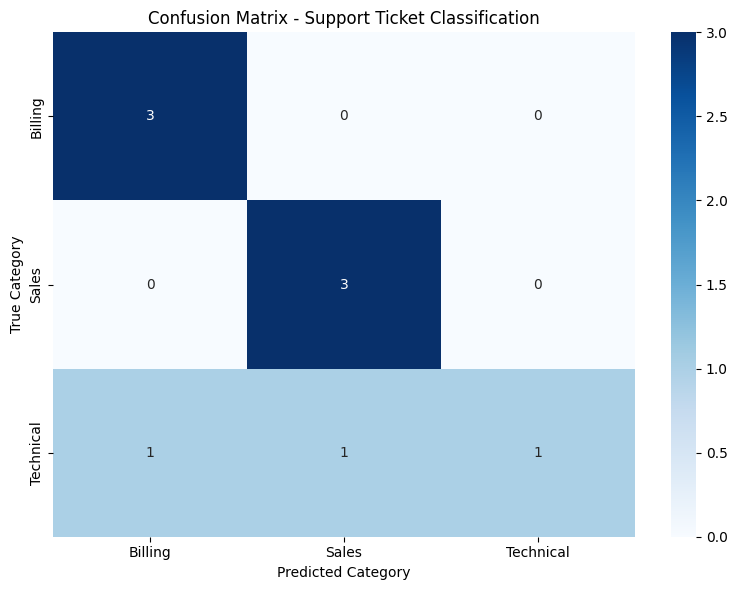

In [21]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a figure for the heatmap
plt.figure(figsize=(8, 6))
# Plot the confusion matrix as a heatmap for better visualization
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Billing', 'Sales', 'Technical'], # Labels for predicted categories
            yticklabels=['Billing', 'Sales', 'Technical']) # Labels for true categories
plt.title('Confusion Matrix - Support Ticket Classification') # Title of the plot
plt.ylabel('True Category') # Y-axis label
plt.xlabel('Predicted Category') # X-axis label
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show() # Display the plot


With the labels `['Billing', 'Sales', 'Technical']` for both true (rows) and predicted (columns) categories:

- **Row 1 (True Billing Tickets):**
  - The model correctly predicted **3** 'Billing' tickets as 'Billing'.
  - It incorrectly predicted **0** 'Billing' tickets as 'Sales'.
  - It incorrectly predicted **0** 'Billing' tickets as 'Technical'.
  - This means all 3 actual Billing tickets were correctly classified.

- **Row 2 (True Sales Tickets):**
  - The model incorrectly predicted **0** 'Sales' tickets as 'Billing'.
  - It correctly predicted **3** 'Sales' tickets as 'Sales'.
  - It incorrectly predicted **0** 'Sales' tickets as 'Technical'.
  - This means all 3 actual Sales tickets were correctly classified.

- **Row 3 (True Technical Tickets):**
  - The model incorrectly predicted **1** 'Technical' ticket as 'Billing'.
  - It incorrectly predicted **1** 'Technical' ticket as 'Sales'.
  - It correctly predicted **1** 'Technical' ticket as 'Technical'.
  - This indicates that out of 3 actual Technical tickets, only 1 was correctly classified, while 2 were misclassified (one as Billing and one as Sales).

**In summary:**
- The model performed perfectly in identifying 'Billing' and 'Sales' tickets, achieving 100% recall for both categories on this small test set.
- However, the model struggled significantly with 'Technical' tickets, only correctly identifying 1 out of 3. Two 'Technical' tickets were wrongly routed to 'Billing' and 'Sales' departments, respectively.

## Part 5: Analyze Important Words per Category

Let's see which keywords are most important for each category.

In [22]:
# Get feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

print("="*70)
print("MOST IMPORTANT WORDS PER CATEGORY")
print("="*70)

# Define the categories for iteration
categories = ['Billing', 'Technical', 'Sales']
for idx, category in enumerate(categories):
    # Get coefficients for the current category from the classifier
    # These coefficients represent the importance of each word for that category
    coef = classifier.coef_[idx]

    # Get the indices of the top 10 words with the highest coefficients
    # argsort sorts in ascending order, [-10:][::-1] reverses to get top 10
    top_indices = np.argsort(coef)[-10:][::-1]
    # Retrieve the actual words using the indices
    top_words = [feature_names[i] for i in top_indices]
    # Retrieve the scores (coefficients) for these top words
    top_scores = [coef[i] for i in top_indices]

    print(f"\n{category} Team - Top Keywords:")
    # Print each top word and its corresponding score
    for word, score in zip(top_words, top_scores):
        print(f"  '{word}': {score:.3f}")

MOST IMPORTANT WORDS PER CATEGORY

Billing Team - Top Keywords:
  'payment': 0.787
  'charged': 0.570
  'subscription': 0.472
  'didn': 0.432
  'refund': 0.416
  'need': 0.330
  'incorrect': 0.326
  'check': 0.326
  'billing': 0.326
  'recent': 0.307

Technical Team - Top Keywords:
  'interested': 0.544
  'premium': 0.499
  'upgrade': 0.480
  'product': 0.467
  'pricing': 0.444
  'enterprise': 0.375
  'information': 0.315
  'plan': 0.309
  'looking': 0.299
  'current': 0.299

Sales Team - Top Keywords:
  'error': 0.647
  'app': 0.642
  'getting': 0.486
  'bug': 0.475
  'server': 0.348
  'today': 0.331
  'running': 0.331
  'slow': 0.331
  'website': 0.331
  'access': 0.331


## Part 6: Test with New Unseen Tickets

In [23]:
# New unseen tickets to be classified
new_tickets = [
    "I need help with a refund for my last payment",
    "The application is showing error 500 and crashing",
    "Can I get a demo of the premium features",
    "Payment was charged twice on my credit card",
    "Server timeout when trying to upload files",
    "Interested in enterprise pricing for 50 users"
]

# Vectorize the new tickets using the same vectorizer fitted on the training data
new_tickets_vectorized = vectorizer.transform(new_tickets)

# Predict the categories for the new vectorized tickets
predictions = classifier.predict(new_tickets_vectorized)
# Predict the probability of each category for the new tickets
probabilities = classifier.predict_proba(new_tickets_vectorized)

print("="*70)
print("TESTING WITH NEW TICKETS")
print("="*70)
print("\nPredictions for new tickets:\n")

# Iterate through each new ticket, its prediction, and probabilities
for i, (ticket, prediction, probs) in enumerate(zip(new_tickets, predictions, probabilities)):
    print(f"Ticket {i+1}: \"{ticket}\"")
    print(f"  → Predicted: {prediction}")
    # Display confidence for each category
    print(f"  → Confidence: Billing={probs[0]:.2%}, Sales={probs[1]:.2%}, Technical={probs[2]:.2%}")
    print()

TESTING WITH NEW TICKETS

Predictions for new tickets:

Ticket 1: "I need help with a refund for my last payment"
  → Predicted: Billing
  → Confidence: Billing=82.60%, Sales=9.10%, Technical=8.30%

Ticket 2: "The application is showing error 500 and crashing"
  → Predicted: Technical
  → Confidence: Billing=29.58%, Sales=16.81%, Technical=53.61%

Ticket 3: "Can I get a demo of the premium features"
  → Predicted: Sales
  → Confidence: Billing=14.38%, Sales=70.78%, Technical=14.84%

Ticket 4: "Payment was charged twice on my credit card"
  → Predicted: Billing
  → Confidence: Billing=89.22%, Sales=5.69%, Technical=5.08%

Ticket 5: "Server timeout when trying to upload files"
  → Predicted: Technical
  → Confidence: Billing=22.43%, Sales=26.31%, Technical=51.26%

Ticket 6: "Interested in enterprise pricing for 50 users"
  → Predicted: Sales
  → Confidence: Billing=6.53%, Sales=86.78%, Technical=6.70%



In [24]:
# Show BoW representation of the first ticket
print(f"First ticket: \"{df['ticket_text'][0]}\"")
print(f"\nBoW vector (showing non-zero values only):")

# Convert the sparse vector of the first ticket to a dense array
ticket_vector = X[0].toarray()[0]
# Get the list of feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()
# Find indices where the word count is greater than 0
non_zero_indices = np.where(ticket_vector > 0)[0]

# Print the words and their counts for the first ticket
for idx in non_zero_indices:
    print(f"  '{feature_names[idx]}': {ticket_vector[idx]}")

First ticket: "I was charged twice for my subscription this month"

BoW vector (showing non-zero values only):
  'charged': 1
  'month': 1
  'subscription': 1
  'twice': 1


## Part 7: Visualize Word Frequencies

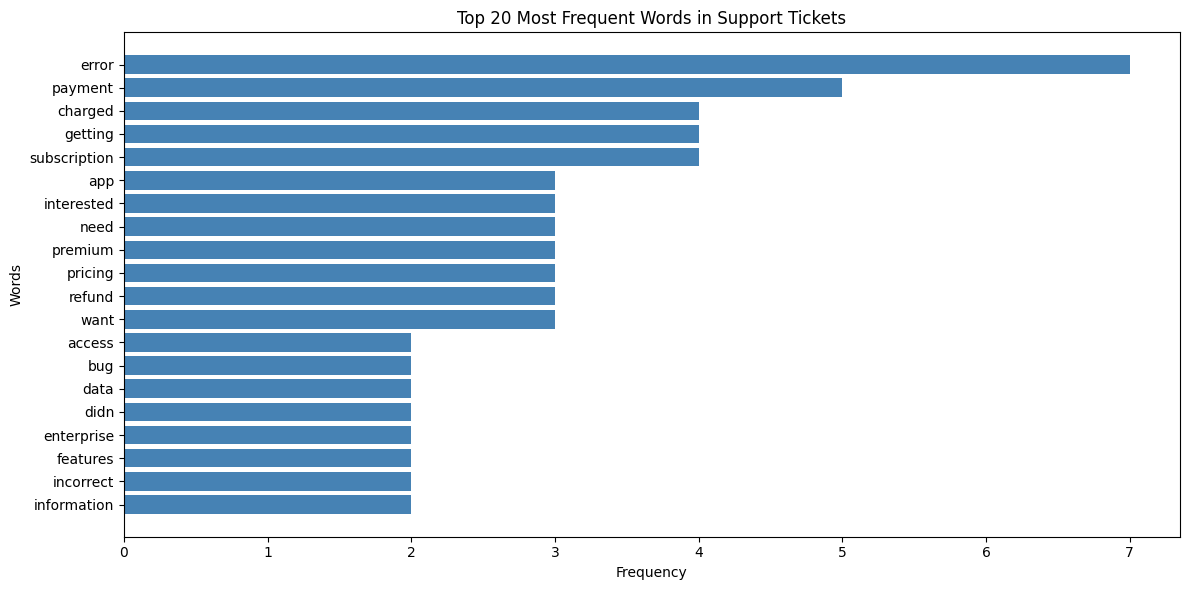

In [12]:
# Calculate total word frequencies across all tickets
# X.sum(axis=0) sums the counts for each word (column) across all documents (rows)
word_freq = np.asarray(X.sum(axis=0)).flatten()
# Create a dictionary mapping feature names (words) to their total frequencies
word_freq_dict = dict(zip(feature_names, word_freq))

# Get the top 20 most frequent words by sorting the dictionary items by frequency in descending order
top_20_words = sorted(word_freq_dict.items(), key=lambda x: x[1], reverse=True)[:20]

# Separate words and their frequencies for plotting
words = [w[0] for w in top_20_words]
frequencies = [w[1] for w in top_20_words]

# Create a horizontal bar chart to visualize word frequencies
plt.figure(figsize=(12, 6))
plt.barh(words, frequencies, color='steelblue') # Horizontal bar chart
plt.xlabel('Frequency') # X-axis label
plt.ylabel('Words') # Y-axis label
plt.title('Top 20 Most Frequent Words in Support Tickets') # Plot title
plt.gca().invert_yaxis() # Invert y-axis to display the most frequent word at the top
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show() # Display the plot

## Part 8: Save the Model for Production Use

In [13]:
import pickle # Import the pickle module for serializing Python objects

# Save the trained CountVectorizer object to a file
# 'wb' mode means write in binary format
with open('bow_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

# Save the trained Logistic Regression classifier object to a file
with open('ticket_classifier.pkl', 'wb') as f:
    pickle.dump(classifier, f)

print("="*70)
print("MODEL SAVED")
print("="*70)
print("\n✓ Model saved successfully!")
print("  - Vectorizer: bow_vectorizer.pkl")
print("  - Classifier: ticket_classifier.pkl")

MODEL SAVED

✓ Model saved successfully!
  - Vectorizer: bow_vectorizer.pkl
  - Classifier: ticket_classifier.pkl


In [ ]:
## How to Use the Saved Model
"""python
# Load the saved model
import pickle

with open('bow_vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

with open('ticket_classifier.pkl', 'rb') as f:
    classifier = pickle.load(f)

# Classify a new ticket
new_ticket = ["I was charged twice for my subscription"]
ticket_vector = vectorizer.transform(new_ticket)
prediction = classifier.predict(ticket_vector)
print(f"Route to: {prediction[0]} team")
"""

## Key Takeaways

1. **BoW is simple but effective** for keyword-based classification
2. **Works well** when categories have distinct vocabularies
3. **Fast** training and prediction
4. **Interpretable** - you can see exactly which words matter
5. **Good baseline** before trying more complex methods

### Limitations to Note:
- No understanding of word relationships ("good" vs "excellent")
- Loses word order ("not good" vs "good")
- Creates sparse vectors
- Sensitive to vocabulary size

**Next Steps**: Check out TF-IDF and N-grams notebooks for improvements on these limitations!